# 라이브러리 및 모듈 호출

In [7]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

# 데이터 불러오기

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 266s 2us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# 데이터 확인

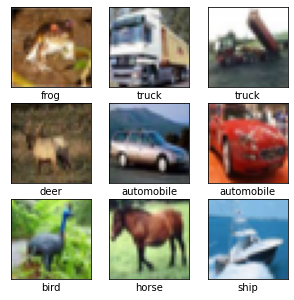

In [4]:
np.random.seed(3)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5,5))
for i , idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

# 데이터 전처리

In [6]:
x_mean = np.mean(x_train, axis=(0,1,2)) # rgb 채널별로 평균과 표준편차 구하기
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train-x_mean)/x_std
x_test = (x_test-x_mean)/x_std

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


# 모델 구성 및 컴파일

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(Conv2D(64,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(Conv2D(128,3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(0.0001),loss='sparse_categorical_crossentropy',metrics=['acc'])

# 모델 학습

In [9]:
history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/30
1094/1094 [==============================] - 20s 12ms/step - loss: 1.6409 - acc: 0.4057 - val_loss: 1.3738 - val_acc: 0.5041
Epoch 2/30
1094/1094 [==============================] - 13s 11ms/step - loss: 1.2747 - acc: 0.5493 - val_loss: 1.1928 - val_acc: 0.5767
Epoch 3/30
1094/1094 [==============================] - 13s 11ms/step - loss: 1.0942 - acc: 0.6131 - val_loss: 1.0627 - val_acc: 0.6262
Epoch 4/30
1094/1094 [==============================] - 13s 11ms/step - loss: 0.9563 - acc: 0.6670 - val_loss: 1.0083 - val_acc: 0.6437
Epoch 5/30
1094/1094 [==============================] - 13s 11ms/step - loss: 0.8539 - acc: 0.7011 - val_loss: 0.9209 - val_acc: 0.6753
Epoch 6/30
1094/1094 [==============================] - 13s 12ms/step - loss: 0.7644 - acc: 0.7351 - val_loss: 0.9817 - val_acc: 0.6651
Epoch 7/30
1094/1094 [==============================] - 13s 11ms/step - loss: 0.6837 - acc: 0.7653 - val_loss: 0.8851 - val_acc: 0.6969
Epoch 8/30
1094/1094 [==========================

# 학습 과정 시각화

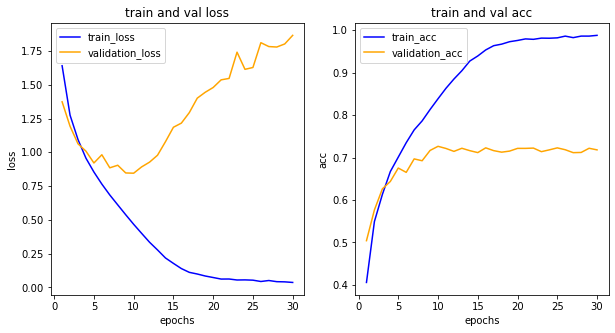

In [12]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='b', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='validation_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='b', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='validation_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()